# Исследование рынка недвижимости в Ленинградской области

**Целью** проводимого исследования будет изучение различных особенностей и *зависимостей*, которых присутствуют на *рынке недвижимости* в городе Санкт-Петербург и соседних населенных пунктах. 
Исходными данными для проекта являться *информация сервиса Яндекс-Недвижимость*, включающая архив объявлений о продаже квартир за несколько лет. 

К имеющимся данным относятся параметры характеризующие как саму квартиру, так и метаданные объявления о ее продаже. 
Условно эти входные данные можно разделить на три категории - *географические* (расстояния до центра, аэропорта, число парков и водоемов вокруг, название населенного пункта), *собственные данные о квартире* (число балконов, высота потолков, этаж, всего этаже, апартаменты, площадь кухни, жилая площадь, общая площадь, число комнат, цена, свободная планировка, студия) и *данные об объявлении* (сколько дней было размещено объявление, дата публикации, число фотографий квартиры в объявлении). 

В ходе работы проведем общее изучение имеющихся данных, их предобработку, введем для анализа ряд новых параметров, исследуем взаимосвязь некоторых из имеющихся величин и сделаем общие выводы по полученным результатам. 

## 1. Изучение входных данных
Откроем файл с входными данными для изучения общей информации. Для первых выводов построим общую гистограмму для всех столбцов исходной таблицы. 

In [5]:
#импортируем библиотеку pandas
import pandas as pd

In [6]:
#считываем данные из файла real_estate_data в dataframe data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [7]:
#выводим общую информацию о полученном датафрейме 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод**: Из приведенной информации видно, что в части столбцов имеются пропуски значений, а в части представлен неккоректный тип данных.

In [8]:
#для общей информации выведем также первые 10 строчек исходной таблиццы
pd.set_option('display.max_columns', None)
data.head(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


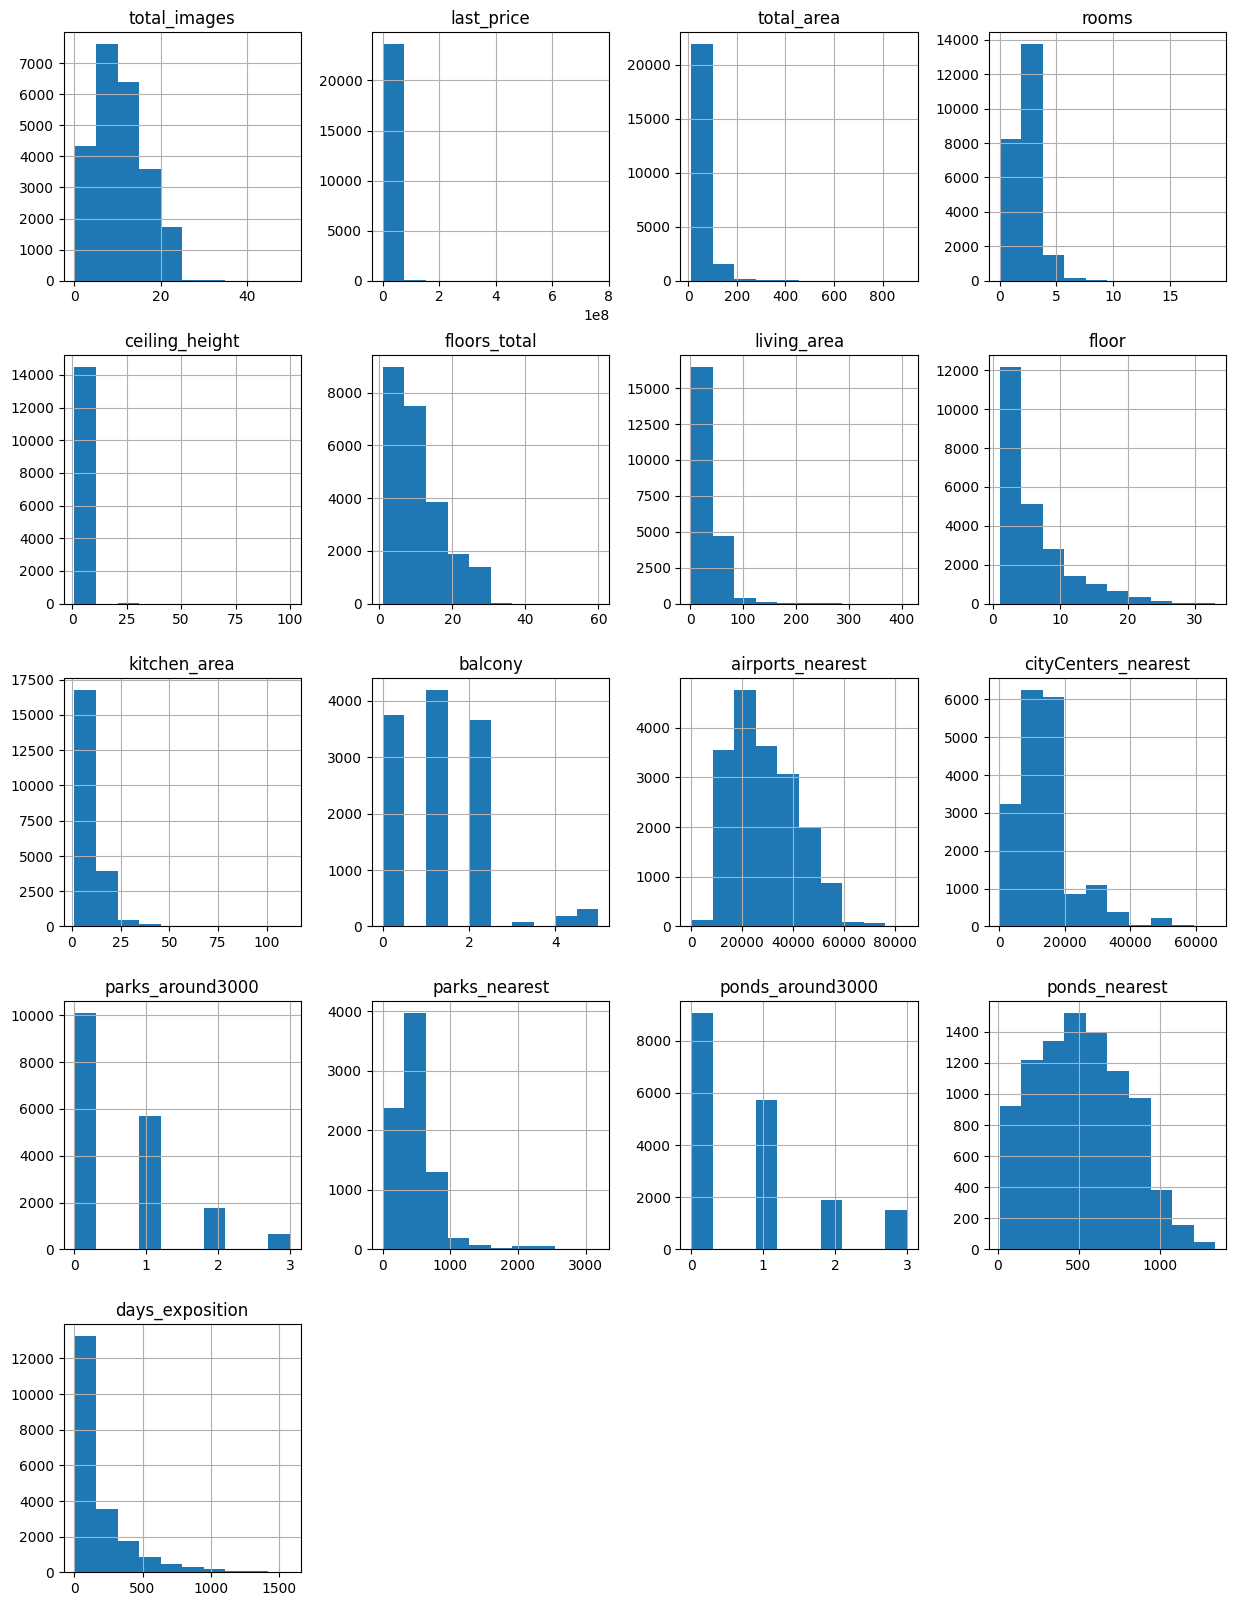

In [9]:
#построение общей гистограммы для всех числовых столбцов таблицы. 
data.hist(figsize=(15,20));

**Вывод**: из приведенных гистограмм видно, что для некоторых величин имеются аномальные значения (например для высоты потолка, количеству комнат и общей площади).

**Общий вывод**: Таким образом, полученные данные нуждаются в предобработке - восстановлению пропущенных значений, удалению аномальных значений, изменению типов данных. 

## 2. Предобработка входных данных

Проведем предобработку данных. Для этого определим и проанализируем наличие пропусков, проанализируем тип данных для каждой строчки, изучим уникальные значения в столбцах и проведем поиск дубликатов, устраним редкие и выбивающиеся значения. 

In [10]:
#выведем информацию о количестве пропущенных данных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из данных выше видно, что пропущены значения *высоты потолков, количества этажей в доме, жилой площади, принадлежности к классу апартаментов, площади кухонь, числа балконов, названия населенных пунктов, расстояние до ближайшего аэропорта, расстояния до центра города, расстояние до ближайшего парка, количество прудов в районе 3 км, расстояния до ближайшего пруда, количество дней размещения объявления*. 

### 2.1 Восстановление пропущенных значений
Проанализируем каждый вид пропусков в отдельности и заполним по возможности пропущенные значения. 

В случах пропуска значений *количества балконов* в квартире будем считать, что балконы в этой квартире *отсутствуют*. 

In [11]:
#заменим пропущенные значения количества балконов нулевыми значениями
data['balcony'] = data['balcony'].fillna(0)
#выведем количество нулевых значений 
data['balcony'].isnull().sum()

0

Аналогичную логику можно применить к *числу парков и водоемов в радиусе 3 км*. Примем, что если их значение не указано, то оно равняется нулю. 

In [12]:
#заменим пропущенные значения количества парков и водоемов в районе 3 км нулевыми значениями. 
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#выведем количество нулвых значений
data['parks_around3000'].isnull().sum()
data['ponds_around3000'].isnull().sum()

0

Отсутствующие площади кухонь, высот потолков, жилые площади и общей площади заменим медианным значением соответсвующего населенного пункта.  

In [13]:
#группируем данные по населенному пункту и вписываем в пропущенные значения медианное значение соответствующее группе для
#высоты потолков, площади кухни, жилой площади и общей площади
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('locality_name')['kitchen_area'].transform('mean'))
data['living_area'] = data['living_area'].fillna(data.groupby('locality_name')['living_area'].transform('mean'))


В случае отсутсвия значений расстояния до центра города примем, что эти объекты находятся в центре города и расстояние составляет 0 км. Заполним соответсвующие пропуски нулями.

In [14]:
#заполняем пропуски значений расстояния до центра города нулями
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

В случае если не указано, является ли объект *апартаментом*, примем, что было указано что *не является*. 

In [15]:
#пропущенные значения по характеристике апартаменты заменим значением False
data['is_apartment'] = data['is_apartment'].fillna(False)            

In [16]:
#проверим наличие пропущенных значений
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            156
floors_total               86
living_area                22
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               28
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для значений расстояний до аэропорта, парка и пруда, а также дня выставления объявления логичную замену предложить невозможно. 

**Вывод**: Пропущенные значения могли быть вызваны различными причинами. Ближайшие расстояния до прудов и парков могли отсуствовать ввиду того, что в населенном пункте они отсутвуют. Такие данные как количество балконов, апартаментность и количество ближайших прудов и парков в случае их отсутсвия просто обозначают нулевое значение. Для данных по высоте потолков и различных типов площадей помещения можно предположить сложность измерения этих параметров, невозможность отделить кухню от жилового помещения, желание конфиденциальности продавца и пр. 

### 2.2 Изменение типов данных 

Не для каждой из представленных переменных корректно выбран тип данных. Проанализируем текущие типы и проведем соответсвующие со смыслом этих данных изменения. 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23677 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23671 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Изменим типы следующих данных  - общего количества этажей, апартаментность, количество балконов, количество парков и прудов вокруг, количество дней размещения объявления, дату выставления объявления. 


Поскольку переменные количества этажей, балконов, количества прудов и парков и количества дней выставления объявления принимают только целочисленные значения, заменим их тип на целочисленный int. 

In [18]:
#изменяем тип переменных floors_total, balcony, parks_around3000, ponds_around3000, days_exposition на int 
data['floors_total'] = data['floors_total'].astype(int, errors='ignore')
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int, errors='ignore')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23543 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23677 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23671 non-null  float64
 13  balcony               23699 non-null  int32  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Для дальнейшей работы с датой выкладывания объявления переведем эту переменную в тип datetime. Это позволит использовать удобный функционал этого типа переменной для извлечения временных характеристик. 

In [20]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Показатель того, является ли объект апартаментами переведем в булевое значение, учитывая что он может принимать только 2 значения. 

In [21]:
data['is_apartment'] = data['is_apartment'].astype('bool')


**Вывод**: замена типов данных в соответствии с их значением позволит упростить дальнейшую обработку этих данных. 

### 2.3 Устранение неявных дубликатов в названии населенных пунктов

Для дальнейшей корректной работы устраним дубликаты в названии населенных пунктов, которые не связаны с разным регистром, а указаны неявным образом. 

In [22]:
#выведем все уникальные названия населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

При изучении названий населенных пунктов можно заметить несколько особенностей:
- в части дубликатов чередуется использование букв е и ё
- конструкции *городской поселок* и *поселок городского типа* синонимичны
- некоторые объекты дублируется с примечанием их типа (коттеджный, городской), а также присутсвуют и без такой детализации 


Избавимся вручную от указанных проблем. Все буквы ё заменим буквой е, городские поселки, поселки городского типа и коттеджные поселки сведем к одному типу поселок. 

In [23]:
#заменим все буквы ё на е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

#заменим типы поселков на общее название поселок
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')

**Вывод**: устранение неявных дубликатов в названии позволит провести более точный анализ представленных данных. Сведение всех типов поселков к обобщенному в данном случае допустимо, поскольку в дальнейшем мы не будем анализировать различные особенности для каждого из этих типов. 

### 2.4 Устранение аномальных значений

Проведем анализ значений на их аномальность. Устраним редкие и выбивающиеся значения для дальнейшего корректного анализа. 

In [24]:
#рассмотрим основные статистические параметры представленных величин
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23543.000000,23613.000000,23677.000000,23699.000000,23671.000000,23699.000000,18157.000000,23699.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.734102,10.673824,34.417804,5.892358,10.566532,0.591080,28793.672193,10886.426896,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.012723,6.597173,21.196527,4.885249,5.633290,0.959298,12630.880622,9634.613697,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.250000,0.000000,18585.000000,2242.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.846469,4.000000,9.680000,0.000000,26726.000000,11247.000000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.534048,1.000000,37273.000000,15248.500000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Из представленных данных можно заметить, что в таких параметрах как общее количество фотографий квартиры, общая площадь, количество комнат, высота потолков, общее количество этажей, жилая площадь, и количество дней выставления объявления *максимальные значения в несколько раз превышают средние*. 
Устраним полученные выбросы. 

Для аномально высоких значений высоты потолков примем, что если высота была обозначена больше 20 метров, то в данные внесли ошибку - разделим соответсвующие значения на 10. 

In [25]:
import numpy as np 
data['ceiling_height'] = np.where(data['ceiling_height'] >= 20,data['ceiling_height']/10 , data['ceiling_height'])

In [26]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23543.000000,23613.000000,23677.000000,23699.000000,23671.000000,23699.000000,18157.000000,23699.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.707262,10.673824,34.417804,5.892358,10.566532,0.591080,28793.672193,10886.426896,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.287007,6.597173,21.196527,4.885249,5.633290,0.959298,12630.880622,9634.613697,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.250000,0.000000,18585.000000,2242.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.846469,4.000000,9.680000,0.000000,26726.000000,11247.000000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.534048,1.000000,37273.000000,15248.500000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Для остальных типов данных отбросим аномально выбивающиеся значения.

In [27]:
#отбросим аномально высокие значения в соответствии процентилями 99.5 и 0.5, а для высоты потолков с 99.9 и 0.1
new_data = data.query('(last_price < last_price.quantile(.995)) and (last_price > last_price.quantile(.005))')
new_data = new_data.query('(rooms < rooms.quantile(.995)) and (rooms > rooms.quantile(.005))')
new_data = new_data.query('(ceiling_height < ceiling_height.quantile(.999)) and (ceiling_height > ceiling_height.quantile(.001))')
new_data = new_data.query('(total_area < total_area.quantile(.995)) and (total_area > total_area.quantile(.005))')


In [28]:
#определим количество убранных данных
new_data.shape[0] / data.shape[0]

0.9568758175450441

In [29]:
#вернем обратно название нашего датафрейма
data = new_data


Пронанализируем изменившиеся показатели

In [30]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,22677.000000,2.267700e+04,22677.000000,22677.000000,22677.000000,22600.000000,22674.000000,22677.000000,22672.000000,22677.000000,17533.000000,22677.000000,22677.000000,7730.000000,22677.000000,8689.000000,19670.000000
mean,9.874542,5.891066e+06,57.915764,2.036821,2.696432,10.746372,33.078619,5.914936,10.352167,0.595581,28897.477100,11126.726419,0.463906,492.278655,0.585439,521.545057,180.263854
std,5.665182,4.566949e+06,24.702352,0.941447,0.204922,6.573281,15.747804,4.878914,4.955643,0.963116,12721.486405,9662.048879,0.738757,342.815699,0.877727,277.595619,218.731140
min,0.000000,8.200000e+05,24.420000,1.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000e+06,40.200000,1.000000,2.550000,5.000000,19.100000,2.000000,7.200000,0.000000,18488.000000,3010.000000,0.000000,288.000000,0.000000,298.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.800000,4.000000,9.500000,0.000000,26941.000000,11493.000000,0.000000,456.000000,0.000000,505.000000,95.000000
75%,14.000000,6.700000e+06,68.800000,3.000000,2.700000,16.000000,40.900000,8.000000,11.475952,1.000000,37412.000000,15393.000000,1.000000,613.750000,1.000000,733.000000,231.000000
max,50.000000,5.400000e+07,180.600000,5.000000,4.300000,60.000000,140.000000,33.000000,75.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод**: В рассмотренных данных были объекты с аномально большими значениями - с огромной площадью, большим количеством комнат, стоимостью квартиры и высотой потолков. Отбросив аномально высокие значения в соответсвии с процентилями 99.5 и 0.5, мы отбрасываем порядка 5% данных. 

## 3. Добавление новых параметров 

Для дальнейшего исследования добавим новые данные в текущую таблицу. 
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [31]:
#рассчитываем цену за квадратный метр
data['price_per_meter'] = data['last_price']/data['total_area']

In [32]:
#определяем день недели публикации объявления
data['day_of_publication'] = data['first_day_exposition'].dt.weekday

In [33]:
#определяем месяц публикации объявления
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month 

In [34]:
#определяем год публикации объявления
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year 

In [35]:
#проводим классификацию этажей
data['type_of_floor'] = np.where((data['floor'] == 1) & (data['floor']!=data['floors_total']), 'первый', 'другой')
data['type_of_floor'] = np.where(data['floor']==data['floors_total'], 'последний', data['type_of_floor'])

In [36]:
#рассчитываем расстояние до центра в километрах 
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

## 4. Исследовательский анализ данных

### 4.1 Изучение параметров продаваемых объектов 

Проведем анализ параметров объектов и отметим возникающие наблюдения. 
В качестве рассматриваемых возьмем следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для всех параметров построим соответствующие гистограмы и выведем основыне статистические характеристики. 

#### 4.1.1 Общая площадь

In [37]:
#основые параметры распределения для общей площади
data['total_area'].describe()

count    22677.000000
mean        57.915764
std         24.702352
min         24.420000
25%         40.200000
50%         52.000000
75%         68.800000
max        180.600000
Name: total_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

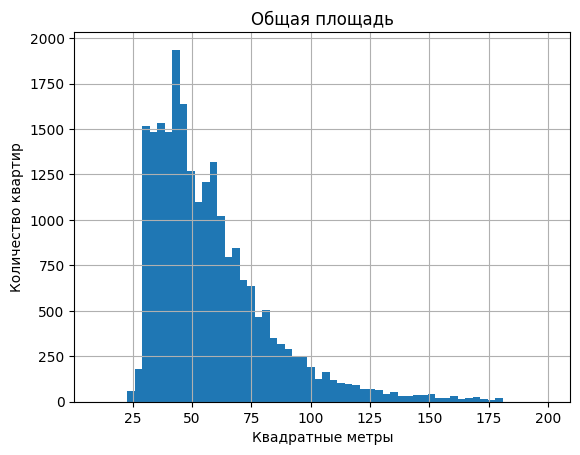

In [38]:
#импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
data['total_area'].describe()
#строим гистограмму для общей площади квартир.
data['total_area'].hist(bins=60, range = (10,200))

plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Средняя площадь квартир порядка 57.9 метров, квартиры с площадьми больше 100 метров и меньше 25 метров практически не встречаются. Конкретные пики на гистограмме говорят о наличии некоторых типовых планировок для квартир. 

#### 4.1.2 Жилая площадь

In [39]:
#основые параметры распределения для жилой площади
data['living_area'].describe()

count    22674.000000
mean        33.078619
std         15.747804
min          2.000000
25%         19.100000
50%         30.800000
75%         40.900000
max        140.000000
Name: living_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

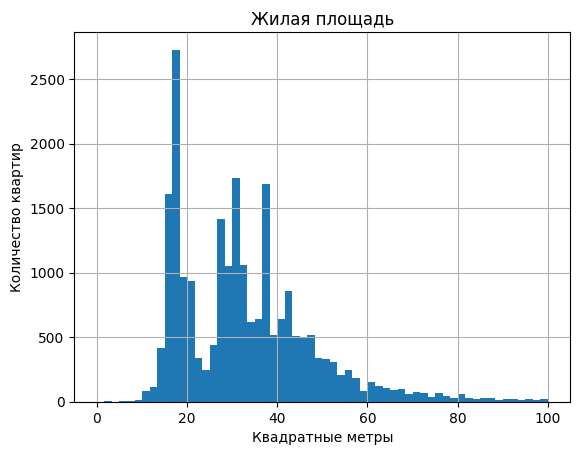

In [40]:
#строим гистограмму для жилой площади квартир
data['living_area'].hist(bins=60, range = (0,100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Средняя площадь жилой части представленных объектов 33 метра. На графике выделяются два пика, что опять же сигнализирует от наличие стандартных планировок для жилой части помещений. Объекты с жилой площадью меньше 10 и и больше 60 метров встречаются редко. 

#### 4.1.3 Площадь кухни 

In [41]:
#основые параметры распределения для площадей кухонь
data['kitchen_area'].describe()

count    22672.000000
mean        10.352167
std          4.955643
min          1.300000
25%          7.200000
50%          9.500000
75%         11.475952
max         75.000000
Name: kitchen_area, dtype: float64

Text(0, 0.5, 'Количество квартир')

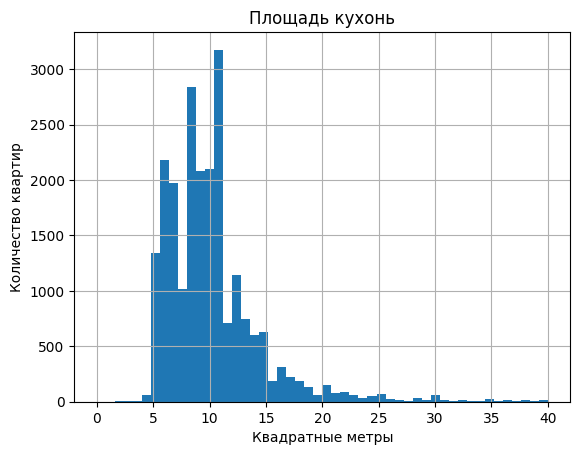

In [42]:
#строим гистограмму для площади кухонь
data['kitchen_area'].hist(bins=50, range = (0,40))
plt.title('Площадь кухонь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

Средняя площадь кухни составляет 10.3 квадратных метров. Кухонь с площадью больше 20 и меньше 5 метров назначительное количество. Опять же определяются можно заметить что некоторые планировки пользуются наибольшей популярностью.

#### 4.1.4 Цена объекта

In [43]:
#основые параметры распределения для цены объекта
data['last_price'].describe()

count    2.267700e+04
mean     5.891066e+06
std      4.566949e+06
min      8.200000e+05
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      5.400000e+07
Name: last_price, dtype: float64

Text(0, 0.5, 'Количество квартир')

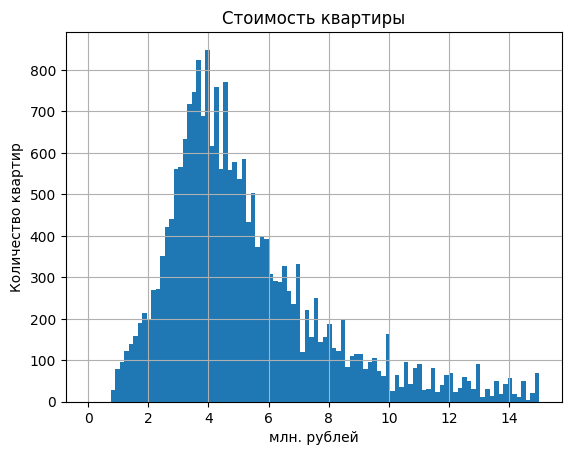

In [44]:
#переведем для удобства в млн 
data['last_price_mln'] = data['last_price']/1000000
#строим гистограмму для стоимости квартиры

data['last_price_mln'].hist(bins=100, range = (0, 15))
plt.title('Стоимость квартиры')
plt.xlabel('млн. рублей')
plt.ylabel('Количество квартир')

Средняя стоимость квартир 5.8 млн рублей. Распределение по стоимости квартир имеет практический нормальный вид. Квартиры со стоимостью больше 8 млн и меньше 2 млн встречаются редко. 

#### 4.1.5 Количество комнат

In [45]:
#основые параметры распределения для количества комнат
data['rooms'].describe()

count    22677.000000
mean         2.036821
std          0.941447
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

Text(0, 0.5, 'Количество квартир')

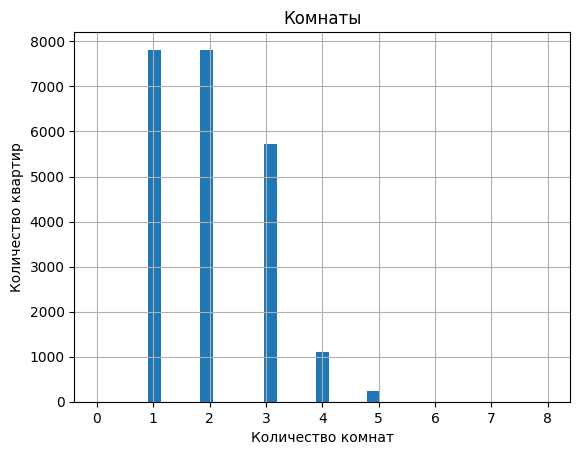

In [46]:
#строим гистограмму для количества комнат
data['rooms'].hist(bins=35, range = (0,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')

Наибольшее количество квартир - однокомнатные и двухкомнатные, квартир с большим количеством комнат значительно меньше. 

#### 4.1.6 Высота потолков

In [47]:
#основые параметры распределения для количества комнат
data['ceiling_height'].describe()

count    22677.000000
mean         2.696432
std          0.204922
min          2.400000
25%          2.550000
50%          2.700000
75%          2.700000
max          4.300000
Name: ceiling_height, dtype: float64

Text(0, 0.5, 'Количество квартир')

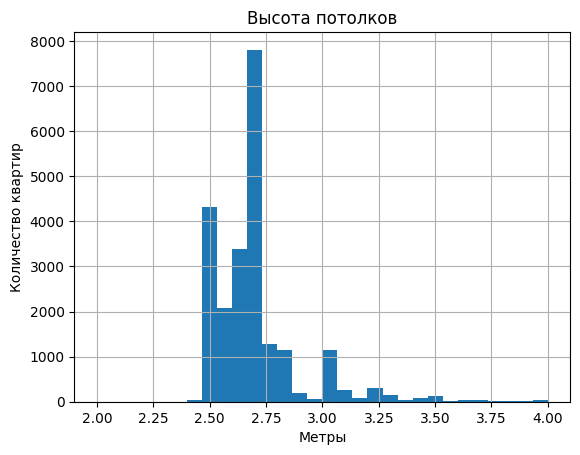

In [48]:
#строим гистограмму для высоты потолков
data['ceiling_height'].hist(bins=30, range = (2,4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Средняя высота потолков - 2.69 метров. Потолки выше 4 метров и ниже 2.5 практически не встречаются. 

#### 4.1.7 Этаж квартиры

In [49]:
#основые параметры распределения для этажа квартир
data['floor'].describe()

count    22677.000000
mean         5.914936
std          4.878914
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Text(0, 0.5, 'Количество квартир')

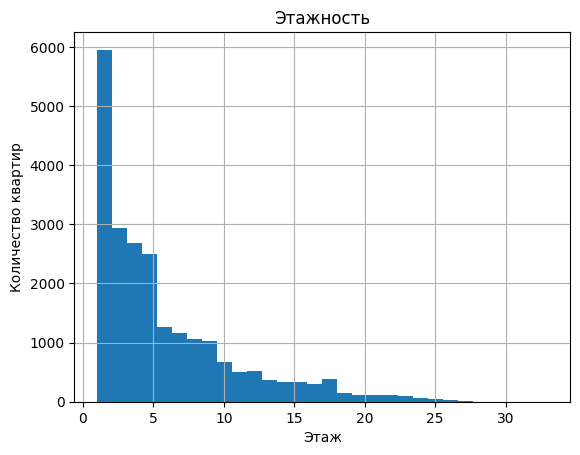

In [50]:
#строим гистограмму для этажей квартир
data['floor'].hist(bins=30)
plt.title('Этажность')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')

Наибольшей популярностью пользуются этажи до 6. На более высоких этажей на порядок меньшее количество людей. 

#### 4.1.8 Тип этажа квартиры

Text(0, 0.5, 'Количество квартир')

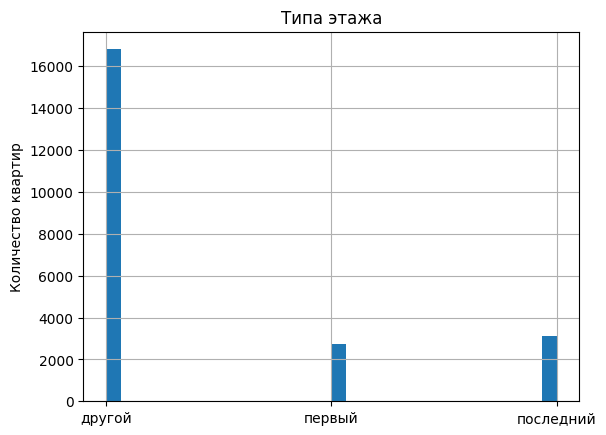

In [51]:
#строим гистограмму для типа этажей 
data['type_of_floor'].hist(bins=30)
plt.title('Типа этажа')
plt.ylabel('Количество квартир')

Предсказуемая статистика, что на промежуточных этажах живет значительно больше людей, чем на первом и на последнем.

#### 4.1.9 Общее количество этажей в доме

In [52]:
#основые параметры распределения для общего количества этажей в доме
data['floors_total'].describe()

count    22600.000000
mean        10.746372
std          6.573281
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Text(0, 0.5, 'Количество квартир')

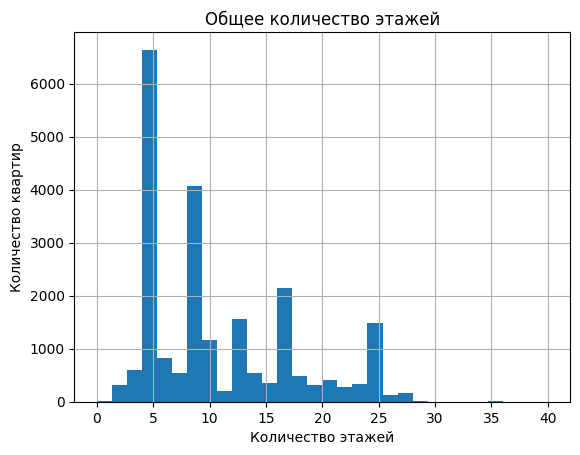

In [53]:
#строим гистограмму для общего числа этажей
data['floors_total'].hist(bins=30, range =(0,40))
plt.title('Общее количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')

Среднее количество этажей в домах - 11. Также из гистограммы можно отметить, что имеется ряд наиболее часто встречающихся количеств этажей в домах.  

#### 4.1.10 Расстояние до центра города в метрах

In [54]:
#основые параметры распределения для расстояния до центра города в метрах
data['cityCenters_nearest'].describe()

count    22677.000000
mean     11126.726419
std       9662.048879
min          0.000000
25%       3010.000000
50%      11493.000000
75%      15393.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Text(0, 0.5, 'Количество квартир')

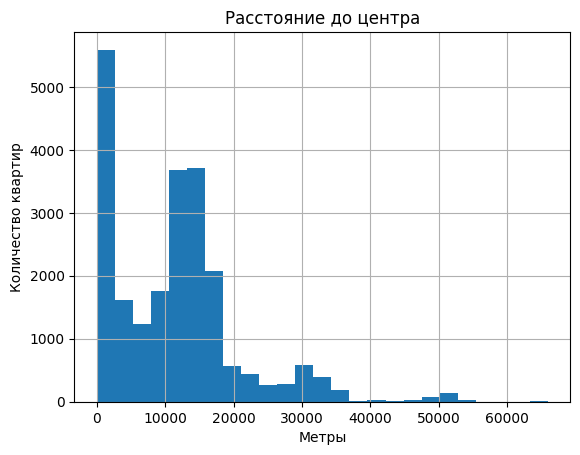

In [55]:
#строим гистограмму для расстояния до центра города в метрах
data['cityCenters_nearest'].hist(bins=25)
plt.title('Расстояние до центра')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Среднее растояние удаленности - 11.1 км от центра города. Наибольшее количество домов находятся в центре города и на расстоянии 1,5 км.

#### 4.1.10 Расстояние до аэропорта в метрах

In [56]:
#основые параметры распределения для расстояния до аэропорта в метрах
data['airports_nearest'].describe()

count    17533.000000
mean     28897.477100
std      12721.486405
min          0.000000
25%      18488.000000
50%      26941.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Text(0, 0.5, 'Количество квартир')

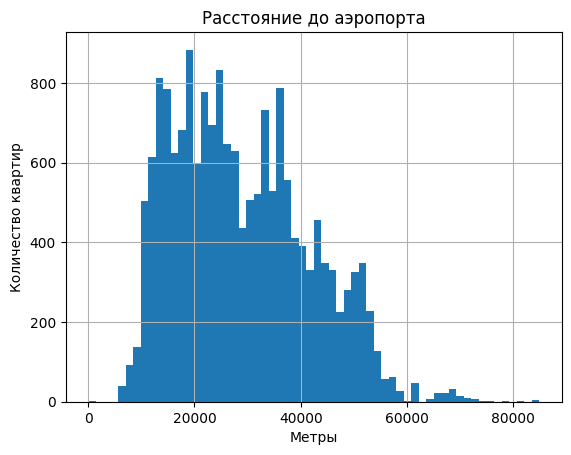

In [57]:
#строим гистограмму для расстояния до аэропорта в метрах
data['airports_nearest'].hist(bins=60)
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Средняя удаленность всех объектов от аэропортов составляет 28.8 км. Большое количество объектов удалены на расстоянии порядка 1.7 и 3.8 км. Дома с расстояниями до 0.5 км и более 60 км практически не встречаются. 

#### 4.1.10 Расстояние до парков в метрах

In [58]:
#основые параметры распределения для расстояния до парков в метрах
data['parks_nearest'].describe()

count    7730.000000
mean      492.278655
std       342.815699
min         1.000000
25%       288.000000
50%       456.000000
75%       613.750000
max      3190.000000
Name: parks_nearest, dtype: float64

Text(0, 0.5, 'Количество квартир')

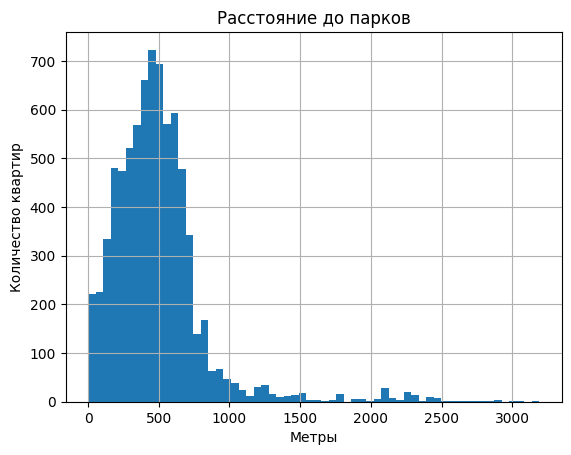

In [59]:
#строим гистограмму для расстояния до парков в метрах
data['parks_nearest'].hist(bins=60)
plt.title('Расстояние до парков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')

Видно, что в среднем парки находятся в хорошей доступности и лишь в небольшом количестве случаев расстояние до парка превышает 1 км. 

#### 4.1.11 День публикации объявления

Text(0, 0.5, 'Количество квартир')

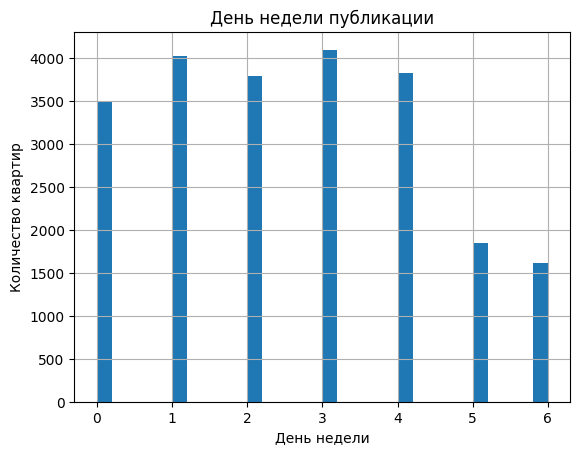

In [60]:
#строим гистограмму для дней недели
data['day_of_publication'].hist(bins=30)
plt.title('День недели публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')

Из гистограммы следует, что реже всего объявления выкладывали по выходным - в субботу и воскресенье. Наиболее "рабочие" дни - середина недели. 

#### 4.1.12 Месяц публикации объявления

Text(0, 0.5, 'Количество квартир')

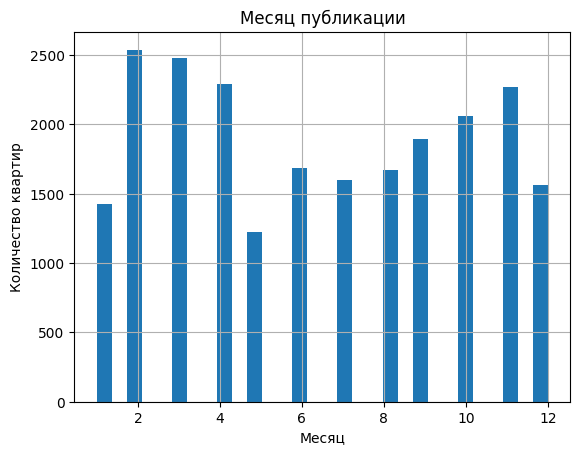

In [61]:
#строим гистограмму для дней недели
data['month_of_publication'].hist(bins=30)
plt.title('Месяц публикации')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')

Из графика видно, что самые популярные месяцы для продажи - февраль и март. Самый непопулярный месяц - май. 

**Выводы**: 
На основе изученных параметров жилых объектов можно отметить следующее
- Средняя площадь квартир порядка 57.9 метров, квартиры с площадьми больше 100 метров и меньше 25 метров практически не встречаются. Конкретные пики на гистограмме говорят о наличии некоторых типовых планировок для квартир.
- Средняя площадь жилой части представленных объектов 33 метра. На графике выделяются два пика, что опять же сигнализирует от наличие стандартных планировок для жилой части помещений. Объекты с жилой площадью меньше 10 и и больше 60 метров встречаются редко. 
- Средняя площадь кухни составляет 10.3 квадратных метров. Кухонь с площадью больше 20 и меньше 5 метров назначительное количество. Опять же определяются можно заметить что некоторые планировки пользуются наибольшей популярностью.
- Средняя стоимость квартир 5.8 млн рублей. Распределение по стоимости квартир имеет практический нормальный вид. Квартиры со стоимостью больше 8 млн и меньше 2 млн встречаются редко.
- Наибольшее количество квартир - однокомнатные и двухкомнатные, квартир с большим количеством комнат значительно меньше. 
- Средняя высота потолков - 2.69 метров. Потолки выше 4 метров и ниже 2.5 практически не встречаются. 
- Наибольшей популярностью пользуются этажи до 6. На более высоких этажей на порядок меньшее количество людей. 
- Предсказуемая статистика, что на промежуточных этажах живет значительно больше людей, чем на первом и на последнем.
- Среднее количество этажей в домах - 11. Также из гистограммы можно отметить, что имеется ряд наиболее часто встречающихся количеств этажей в домах.  
- Среднее растояние удаленности - 11.1 км от центра города. Наибольшее количество домов находятся в центре города и на расстоянии 1,5 км.
- Средняя удаленность всех объектов от аэропортов составляет 28.8 км. Большое количество объектов удалены на расстоянии порядка 1.7 и 3.8 км. Дома с расстояниями до 0.5 км и более 60 км практически не встречаются.
- Видно, что в среднем парки находятся в хорошей доступности и лишь в небольшом количестве случаев расстояние до парка превышает 1 км.
- Из гистограммы следует, что реже всего объявления выкладывали по выходным - в субботу и воскресенье. Наиболее "рабочие" дни - середина недели. 
- Из графика видно, что самые популярные месяцы для продажи - февраль и март. Самый непопулярный месяц - май.  



### 4.2 Скорость продажи квартир

Text(0, 0.5, 'Количество квартир')

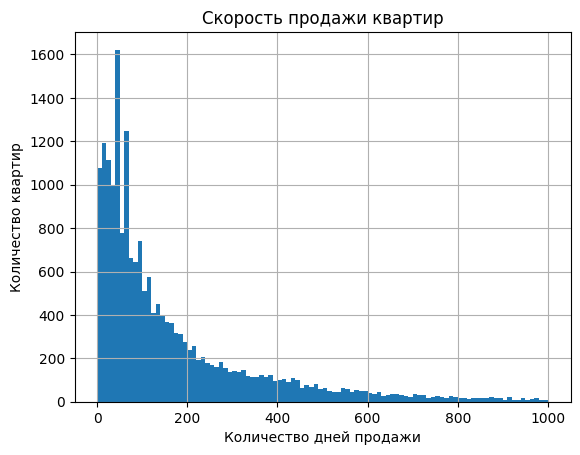

In [62]:
#построим гистограмму количества дней, в течение которых висело объявление о продаже
data['days_exposition'].hist(bins = 100, range = (0,1000))
plt.title('Скорость продажи квартир')
plt.xlabel('Количество дней продажи')
plt.ylabel('Количество квартир')

In [63]:
print('Медианное значение дней размещения объявлений о продаже', data['days_exposition'].median())


Медианное значение дней размещения объявлений о продаже 95.0


In [64]:
print('Среднее значение дней размещения объявлений о продаже', round(data['days_exposition'].mean()))

Среднее значение дней размещения объявлений о продаже 180


**Вывод**: Из графика видно, что большему количеству дней размещения объявления соответствует меньшее количество продаваемых квартир. Быстрой можно считать продажу квартиры за меньше чем 45 дней. Продажу можно считать долгой при количестве дней больше 250.  

### 4.3 Факторы, влияющие на стоимость объектов


Проанализируем влияние различных факторов на стоимость квартиры. 

#### 4.3.1 Общая площадь

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.883864
total_area    0.883864    1.000000 



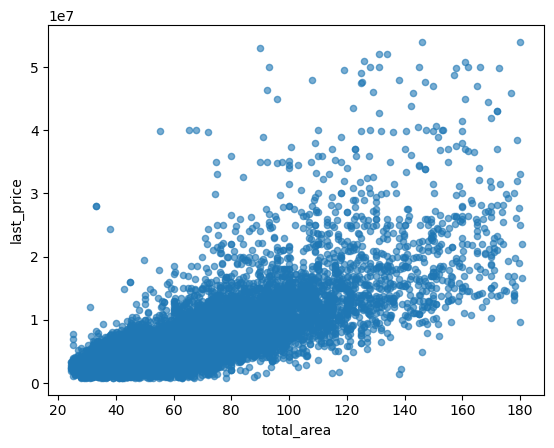

In [65]:
#построим диаграмму рассеяния для общей площади и стоимости квартиры, рассчитаем коэффициант корреляции пирсона 
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.6) 
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Из диаграммы рассеяния и коэффициента корреляции Пирсона равного 0.9 можно однозначного утверждать о прямой взаимосвязи величин общей площади и цены квартиры. Чем больше площадь, тем больше ее стоимость. 

#### 4.3.2 Жилая площадь

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.743797
living_area    0.743797     1.000000 



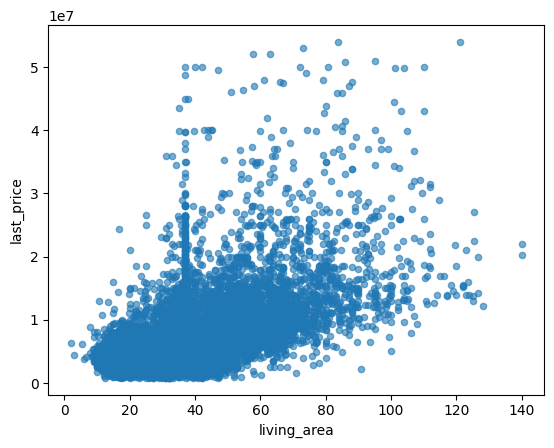

In [66]:
#построим диаграмму рассеяния для жилой площади и стоимости квартиры, рассчитаем коэффициант корреляции пирсона 
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.6) 
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Аналогично для жилой площади получаем однозначную взаимосвязь с стоимостью квартиры. Коэффициент корреляции в этом случае равен 0.74. 

#### 4.3.3 Площадь кухни

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.389849
last_price        0.389849    1.000000 



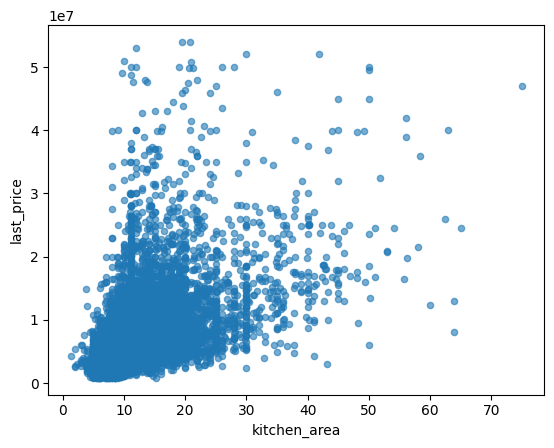

In [67]:
#построим диаграмму рассеяния для площади кухни и стоимости квартиры, рассчитаем коэффициант корреляции пирсона 
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.6) 
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Меньшая чем в предыдущих случаях закономерность, но все же положительная корреляция между площадью кухни и ценой квартиры с коэффициентом 0.38. 

#### 4.3.4 Количество комнат

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.582245
rooms         0.582245  1.000000 



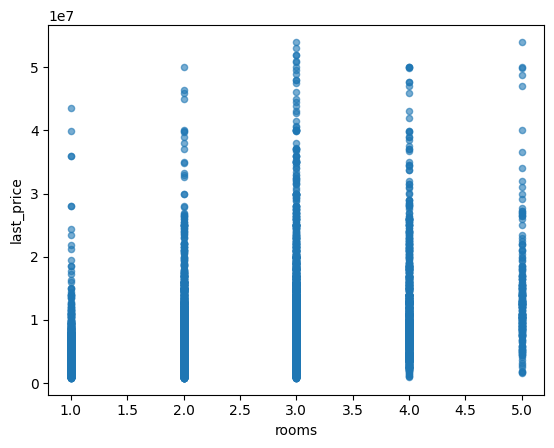

In [68]:
#построим диаграмму рассеяния для количества комнат и  стоимости квартиры, рассчитаем коэффициант корреляции пирсона 
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.6) 
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Аналогично меньшая чем в предыдущих случаях закономерность, но все же положительная корреляция между количеством комнат и ценой квартиры с коэффициентом 0.58. 

#### 4.3.4 Этаж

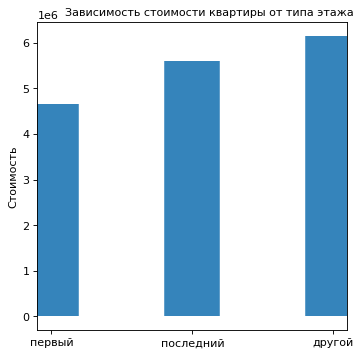

In [69]:
# Зависимость цены от типа этажа 
import matplotlib.patches as patches 

#сгруппируем по типу этажа и вычислим среднее
df = data[['last_price', 'type_of_floor']].groupby('type_of_floor').apply(lambda x: x.mean())

#отсортируем данные 
df.sort_values('last_price', inplace=True)
df.reset_index(inplace=True)

#отобразим на графике полученную закономерность
fig, ax = plt.subplots(figsize=(5,5), facecolor='white', dpi= 80)
ax.vlines(x=df['type_of_floor'], ymin = 0, ymax = df['last_price'], alpha=0.9, linewidth=50)


ax.set_title('          Зависимость стоимости квартиры от типа этажа', fontdict={'size':10})
ax.set(ylabel='Стоимость')


plt.show()


Из приведенного диаграммы видно, что самая дорогие квартиры обычно расположены на последнем этаже. На первых этажах стоимость квартир наоборот ниже среднего. 

#### 4.3.4 День недели, месяц и год

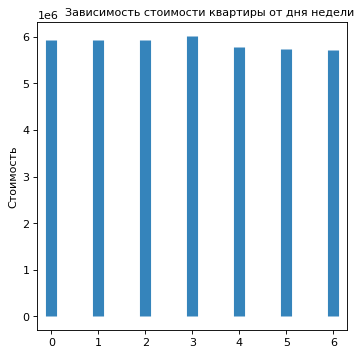

In [70]:
# Зависимость цены от  дня недели 
import matplotlib.patches as patches 

#сгруппируем по типу этажа и вычислим среднее
df = data[['last_price', 'day_of_publication']].groupby('day_of_publication').apply(lambda x: x.mean())



#отобразим на графике полученную закономерность
fig, ax = plt.subplots(figsize=(5,5), facecolor='white', dpi= 80)
ax.vlines(x=df['day_of_publication'], ymin = 0, ymax = df['last_price'], alpha=0.9, linewidth=10)


ax.set_title('          Зависимость стоимости квартиры от дня недели', fontdict={'size':10})
ax.set(ylabel='Стоимость')


plt.show()


Из полученного графика видно, что стоимость квартиры от дня недели практически независит, распределение - равномерное. 

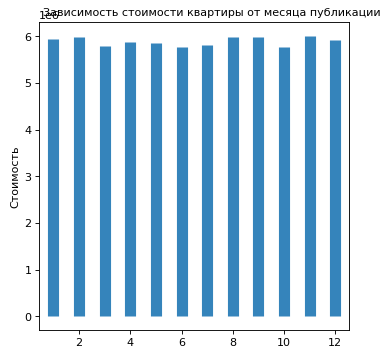

In [71]:
# Зависимость цены от  месяца публикации 

#сгруппируем по типу этажа и вычислим среднее
df = data[['last_price', 'month_of_publication']].groupby('month_of_publication').apply(lambda x: x.mean())



#отобразим на графике полученную закономерность
fig, ax = plt.subplots(figsize=(5,5), facecolor='white', dpi= 80)
ax.vlines(x=df['month_of_publication'], ymin = 0, ymax = df['last_price'], alpha=0.9, linewidth=10)


ax.set_title('          Зависимость стоимости квартиры от месяца публикации', fontdict={'size':10})
ax.set(ylabel='Стоимость')


plt.show()

Аналогично для месяца публикации, распределение равномерное. 

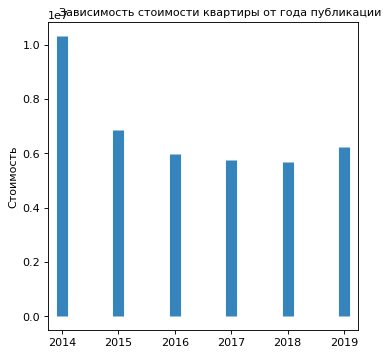

In [72]:
# Зависимость цены от  года публикации 

#сгруппируем по типу этажа и вычислим среднее
df = data[['last_price', 'year_of_publication']].groupby('year_of_publication').apply(lambda x: x.mean())



#отобразим на графике полученную закономерность
fig, ax = plt.subplots(figsize=(5,5), facecolor='white', dpi= 80)
ax.vlines(x=df['year_of_publication'], ymin = 0, ymax = df['last_price'], alpha=0.9, linewidth=10)


ax.set_title('          Зависимость стоимости квартиры от года публикации', fontdict={'size':10})
ax.set(ylabel='Стоимость')


plt.show()

Можно наблюдать определенное снижение стоимости жилищных объектов от 2014 года к 2017 и постепенное возрастание к 2019 году. 

**Выводы**: 
- Можно однозначного утверждать о прямой взаимосвязи величин общей площади и цены квартиры. Чем больше площадь, тем больше ее стоимость.
- Аналогично для жилой площади получаем однозначную взаимосвязь с стоимостью квартиры. 
- Отмечается также положительная корреляция между площадью кухни и ценой квартиры 
- Положительная корреляция и  между количеством комнат и ценой квартиры
- Самые дорогие квартиры обычно расположены на последнем этаже. На первых этажах стоимость квартир наоборот ниже среднего.
- Стоимость квартиры от дня недели и месяца публикации практически независит.  
- Отмечается снижение стоимости объектов от 2014 года к 2017 и постепенное возрастание к 2019 году. 

### 4.4 Средняя стоимость квадратного метра


Определим среднуюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. 

In [73]:
#выберем наиболее популярные локации и определим в них среднуюю цену квадратного метра
good_locality = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ['count', 'mean']).sort_values(by=('count','price_per_meter'), ascending=False)[:10].sort_values(by=('mean','price_per_meter'), ascending=False)

In [74]:
print(good_locality)

                            count            mean
                  price_per_meter price_per_meter
locality_name                                    
Санкт-Петербург             15155   112173.752917
Пушкин                        361   103092.514299
деревня Кудрово               277    92198.474760
поселок Парголово             322    90448.423806
поселок Мурино                515    84690.269284
поселок Шушары                433    78216.796688
Колпино                       336    75239.590783
Всеволожск                    388    68759.897978
Гатчина                       307    68746.146763
Выборг                        228    58168.077590


**Вывод**

Из представленной таблицы видно, что самые большая цена за квадратный метр предсказуемо в Санкт-Петербурге (поскольку это крупный город - мегаполис) - 112173 рубль, а наименьшая цена в городе Выборг - 58168 рубля. 

### 4.5 Средняя цена километра в Санкт-Петербурге

Определим теперь среднуюю цену каждого километра (отсчитываемого от центра города) и проанализируем зависимость стоимости объектов от центра города. 

In [75]:
#выберем данные по городу Санкт-Петербург
data_spb = data[data['locality_name']=='Санкт-Петербург'].reset_index()

Text(0, 0.5, 'Рубли')

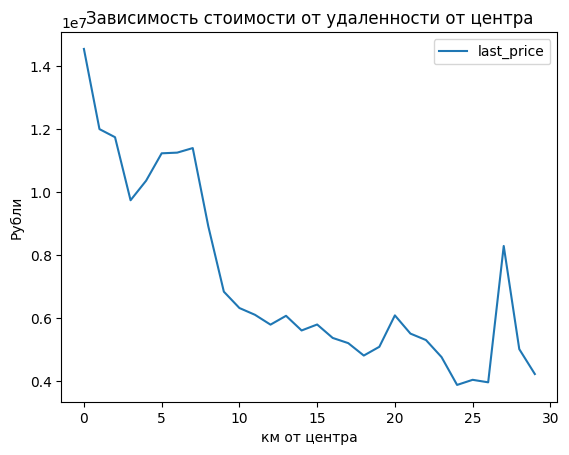

In [76]:
#создадим свобдную таблицу по удаленности от центра в километрах, отобразим ее на графике
data_spb_pivot = data_spb.pivot_table(index='cityCenters_nearest_km', values = 'last_price', aggfunc='mean')
data_spb_pivot.plot()
plt.title('Зависимость стоимости от удаленности от центра')
plt.xlabel('км от центра')
plt.ylabel('Рубли')


In [77]:
print('Коэффициент корреляции между стоимостью и удаленностью от центра', (data_spb['last_price'].corr(data_spb['cityCenters_nearest_km'])))
    

Коэффициент корреляции между стоимостью и удаленностью от центра -0.3964854089714855


На графике прослеживается тренд - наибольшую стоимость имеют квартиры непосредственно находящиеся в центре города. Спустя же 5 км от центра города цены квартир значительно падают. Это подтверждает и отрицательный коэффициент корреляции между величинами равный -0.35.

**Вывод**:
Таким образом получачем предполагаемую зависимость - чем дальше от центра, тем дешевле жилищный объект.

## 5. Выводы

**Основные параметры объектов**: 
Были получены средние значения основных величин, характеризующих наши жилищные объекты:
- общая площадь -  57.9 кв. м
- жилая площадь - 33 кв. м
- площадь кухни - 10.3 кв. м
- цена объекта - 5.8 млн рублей
- количество комнат - 2
- высота потолков - 2.69 м
- этаж квартиры - 6
- тип этажа - промежуточный
- общее количество этажей - 11
- расстояние до центра города - 11.1 км
- расстояние до ближайшего аэропорта -  28.8 км
- расстояние до ближайшего парка - 492 м

Самые непопулярные дни публикации объявлений - суббота и воскресенье. Самые популярные месяцы - февраль и март, самый непопулярный - май.

**Скорость продажи квартир**:
Большему количеству дней размещения объявления соответствует меньшее количество продаваемых квартир. Быстрой можно считать продажу квартиры за меньше чем 45 дней. Продажу можно считать долгой при количестве дней больше 250.  

**Факторы, влияющие на продажу квартир**:
Больше всего на стоимость  влияет общая площадь и жилая площадь помещения. В меньше степени на это влияют площадь кухни и количество комнат, хотя для этих величин также наблюдается положительная корреляция. 
От дня недели и месяца стоимость квартиры практически не зависит.

**Средняя стоимость квадратного метра**: из 10 самых популярных мест наибольшая стоимость квадратного метра у города Санкт-Петербург 112173 рублей, наименьшая у города Выборг - 58168 рублей. 

**Зависимость цены квартиры от удаленности от центра**: отмечается отрицательная корреляция между удаленностью от центра и стоимостью квартиры. 